# 서울시 체육시설과 소득 간 비교 분석
서울데이터허브(전국 체육시설 현황·표준데이터)를 기반으로, 서울특별시 자치구별 시설 유형 분포를 시각화하고 구별 소득과의 관계를 간단히 살펴봅니다.

In [30]:
!pip install pandas matplotlib seaborn openpyxl

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

pd.options.display.max_columns = None
sns.set_theme(style='whitegrid')

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
facility_csv = 'data/전국체육시설 현황(표준데이터).csv'
facility_df = pd.read_csv(facility_csv, encoding='cp949', low_memory=False)
facility_df = facility_df.rename(columns=str.strip)
facility_df.head(3)

,이용단체명,시설생성기준일자,등록신고일자,준공일자,휴업일자,폐업일자,국가체육시설여부,시설명,시설구분명,순번,시설주소,시설상세주소,시설코드,업종명,시설유형명,시설상태명,시설도로명우편번호,시설도로명주소,시설도로명상세주소,우편번호,경도,위도,시설전화번호,자율점검대상여부,등록일시,수정일시,내진설계여부,시설홈페이지,시도,시군구,도로명시도명,도로명시군구명,도로명읍면동명,도로명리명,시설운영형태코드,소유주체명,소유주체시도명,소유주체시군구명,담당자부서명,담당자전화번호,실내야외구분,관람좌석수,관람수용인원수,시설총면적,생활오픈여부,생활체육시설명
0,NaN,20210310,NaN,NaN,NaN,20250620.0,N,위드미 댄스,신고,1,경기도 고양시 덕양구 화정동 968 비젼타워21,1005호,E1DE682A80811DA7E71A53B2F1D45637,무도학원업,무도학원,폐업,10497,경기도 고양시 덕양구 화중로 100(화정동),NaN,10497.0,126.831467,37.636138,NaN,N,2021-08-11,2025-06-21,NaN,NaN,경기도,고양시,경기도,고양시 덕양구,화정동,NaN,자체운영,NaN,경기도,고양시,NaN,NaN,없음,NaN,NaN,88.0,NaN,NaN
1,NaN,20210309,NaN,NaN,NaN,NaN,N,히키스 캐롬 클럽,신고,2,경기도 고양시 덕양구 신원동 633,NaN,97E7959ABA7ED5F870AF36079FC6E98F,당구장업,당구장,정상운영,10571,경기도 고양시 덕양구 신원로 10(신원동),NaN,10571.0,126.890319,37.661865,NaN,Y,2021-08-11,2024-10-31,NaN,NaN,경기도,고양시,경기도,고양시,신원동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,248.0,NaN,NaN
2,NaN,20200929,NaN,NaN,NaN,20240621.0,N,빅이닝 고양 볼파크,신고,3,경기도 고양시 덕양구 오금동 379-1,NaN,0CC77977D1C368EB9B82BB3B85F2F7B7,야구장업,야구장,폐업,10574,경기도 고양시 덕양구 통일로396번길 78-25(오금동),(오금동),10574.0,0.000000,0.000000,NaN,N,2021-08-11,2024-10-31,NaN,NaN,경기도,고양시,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,10308.0,NaN,NaN


In [33]:
facility_excel = 'data/전국체육시설 현황(표준데이터).xlsx'
import importlib, subprocess, sys
if importlib.util.find_spec('openpyxl') is None:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'openpyxl'])
pd.read_excel(facility_excel, engine='openpyxl', nrows=3)

/opt/homebrew/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,이용단체명,시설생성기준일자,등록신고일자,준공일자,휴업일자,폐업일자,국가체육시설여부,시설명,시설구분명,순번,시설주소,시설상세주소,Unnamed: 12,업종명,시설유형명,시설상태명,시설도로명우편번호,시설도로명주소,시설도로명상세주소,Unnamed: 19,Unnamed: 20,Unnamed: 21,시설전화번호,자율점검대상여부,등록일시,수정일시,내진설계여부,시설홈페이지,Unnamed: 28,Unnamed: 29,도로명시도명,도로명시군구명,Unnamed: 32,도로명리명,시설운영형태코드,소유주체명,소유주체시도명,소유주체시군구명,담당자부서명,담당자전화번호,Unnamed: 40,Unnamed: 41,Unnamed: 42,시설총면적,생활오픈여부
0,NaN,20210310,NaN,NaN,NaN,20250620.0,N,위드미 댄스,신고,1,경기도 고양시 덕양구 화정동 968 비젼타워21,1005호,NaN,무도학원업,무도학원,폐업,10497,경기도 고양시 덕양구 화중로 100(화정동),NaN,NaN,NaN,NaN,NaN,N,2021-08-11,2025-06-21,NaN,NaN,NaN,NaN,경기도,고양시 덕양구,NaN,NaN,자체운영,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,88.0,NaN
1,NaN,20210309,NaN,NaN,NaN,NaN,N,히키스 캐롬 클럽,신고,2,경기도 고양시 덕양구 신원동 633,NaN,NaN,당구장업,당구장,정상운영,10571,경기도 고양시 덕양구 신원로 10(신원동),NaN,NaN,NaN,NaN,NaN,Y,2021-08-11,2024-10-31,NaN,NaN,NaN,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN
2,NaN,20200929,NaN,NaN,NaN,20240621.0,N,빅이닝 고양 볼파크,신고,3,경기도 고양시 덕양구 오금동 379-1,NaN,NaN,야구장업,야구장,폐업,10574,경기도 고양시 덕양구 통일로396번길 78-25(오금동),(오금동),NaN,NaN,NaN,NaN,N,2021-08-11,2024-10-31,NaN,NaN,NaN,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10308.0,NaN


### 서울시 자치구 필터링
서울특별시에 있는 시설만 남기고 자치구와 시설 유형 중심으로 분석합니다.

In [34]:
seoul_df = facility_df[facility_df['시도'] == '서울특별시'].copy()
seoul_df['시군구'] = seoul_df['시군구'].str.strip()
seoul_df[['시설명', '시설유형명', '시군구']].head(3)


,시설명,시설유형명,시군구
13,더블원골프 잠실점,골프,송파구
15,수도관멀티짐,우슈,중랑구
16,나비캐롬 망우점,당구장,중랑구


In [35]:
tax_path = 'data/지방세징수(구별)_20251202141719.xlsx'
tax_df = pd.read_excel(tax_path, engine='openpyxl', header=[0, 1, 2])
flat_columns = [
    '_'.join(str(part).strip() for part in col if str(part).strip())
    for col in tax_df.columns
]
tax_df.columns = flat_columns
first_col = tax_df.columns[0]
tax_df = tax_df.rename(columns={first_col: '시군구'})
tax_df['시군구'] = tax_df['시군구'].astype(str).str.strip()
tax_df = tax_df[tax_df['시군구'].str.endswith('구')].copy()
total_candidates = [col for col in tax_df.columns if col.startswith('2024') and '합계' in col]
total_col = total_candidates[0] if total_candidates else tax_df.columns[1]
tax_df['세수총액_2024'] = pd.to_numeric(tax_df[total_col], errors='coerce').fillna(0)
tax_df = tax_df[['시군구', '세수총액_2024']]
tax_df

/opt/homebrew/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시군구,세수총액_2024
3,종로구,1151912
4,중구,1888596
5,용산구,1077754
6,성동구,850440
7,광진구,518326
8,동대문구,545360
9,중랑구,355309
10,성북구,514328
11,강북구,271903
12,도봉구,275284


In [36]:
district_type_counts = (
    seoul_df.groupby(['시군구', '시설유형명'])
    .size()
    .reset_index(name='count')
)
district_totals = (
    district_type_counts
    .groupby('시군구', as_index=False)['count']
    .sum()
    .rename(columns={'count': 'facility_count'})
)
district_totals.sort_values('facility_count', ascending=False).head(5)


,시군구,facility_count
0,강남구,2245
17,송파구,1420
3,강서구,1372
14,서초구,1348
19,영등포구,1325


<Figure size 1600x800 with 0 Axes>

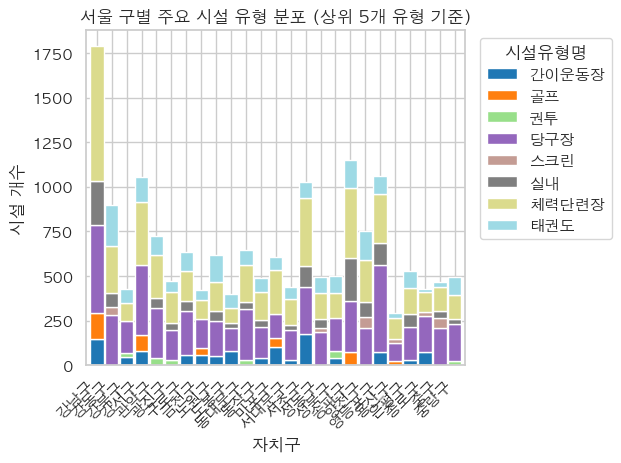

In [37]:
top_types = (
    district_type_counts.sort_values(['시군구', 'count'], ascending=[True, False])
    .groupby('시군구')
    .head(5)
)
stacked = (
    top_types
    .pivot(index='시군구', columns='시설유형명', values='count')
    .fillna(0)
)
stacked = stacked.reindex(sorted(stacked.index))
plt.figure(figsize=(16, 8))
stacked.plot(kind='bar', stacked=True, colormap='tab20', width=0.9)
plt.title('서울 구별 주요 시설 유형 분포 (상위 5개 유형 기준)')
plt.xlabel('자치구')
plt.ylabel('시설 개수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='시설유형명', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
income_values = [
    ('종로구', 4420), ('중구', 4300), ('용산구', 5200), ('성동구', 4700), ('광진구', 4300),
    ('동대문구', 4100), ('중랑구', 4000), ('성북구', 4200), ('강북구', 3900), ('도봉구', 3800),
    ('노원구', 4000), ('은평구', 4100), ('서대문구', 4500), ('마포구', 4700), ('양천구', 4400),
    ('강서구', 4200), ('구로구', 4100), ('금천구', 3900), ('영등포구', 4200), ('동작구', 4300),
    ('관악구', 4000), ('강남구', 5500), ('서초구', 5400), ('송파구', 5200), ('강동구', 4600)
]
income_df = pd.DataFrame(income_values, columns=['시군구', '연간_소득_만원']).sort_values('시군구').reset_index(drop=True)
income_df

,시군구,연간_소득_만원
0,강남구,5500
1,강동구,4600
2,강북구,3900
3,강서구,4200
4,관악구,4000
5,광진구,4300
6,구로구,4100
7,금천구,3900
8,노원구,4000
9,도봉구,3800


In [39]:
district_insights = district_totals.merge(income_df, how='left', on='시군구')
district_insights = district_insights.merge(tax_df, how='left', on='시군구')
district_insights['세수총액_2024'] = district_insights['세수총액_2024'].fillna(0)
district_insights['시설당_소득비율'] = district_insights['facility_count'] / district_insights['연간_소득_만원']
district_insights['시설당_세수비율'] = district_insights['facility_count'] / district_insights['세수총액_2024'].replace(0, np.nan)
district_insights.sort_values('시설당_소득비율', ascending=False)

,시군구,facility_count,연간_소득_만원,세수총액_2024,시설당_소득비율,시설당_세수비율
0,강남구,2245,5500,4614207,0.408182,0.000487
3,강서구,1372,4200,1015315,0.326667,0.001351
19,영등포구,1325,4200,1900774,0.315476,0.000697
17,송파구,1420,5200,1740897,0.273077,0.000816
14,서초구,1348,5400,2585270,0.249630,0.000521
1,강동구,1114,4600,889984,0.242174,0.001252
4,관악구,864,4000,435019,0.216000,0.001986
18,양천구,935,4400,606120,0.212500,0.001543
8,노원구,833,4000,425160,0.208250,0.001959
6,구로구,805,4100,563197,0.196341,0.001429


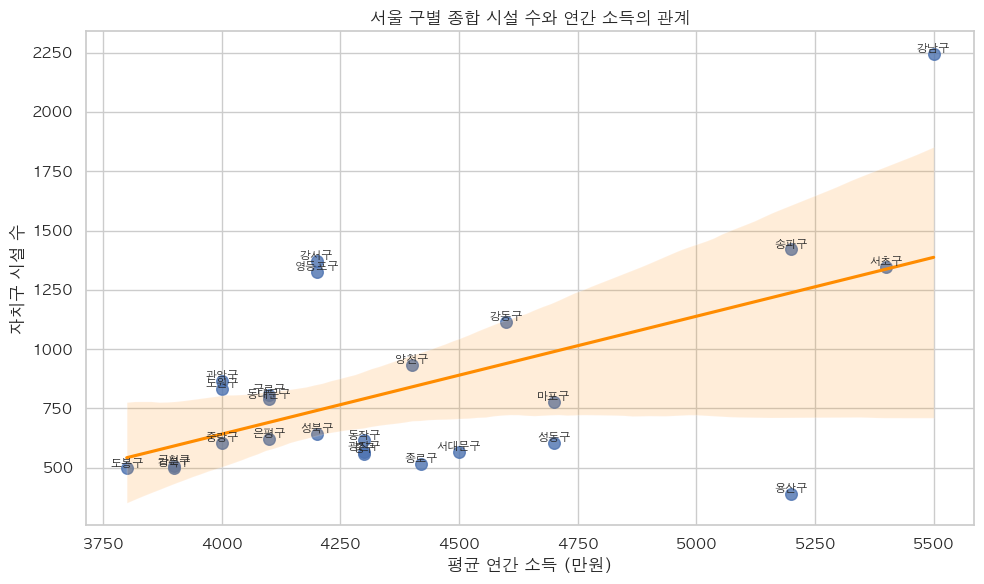

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=district_insights,
    x='연간_소득_만원',
    y='facility_count',
    scatter_kws={'s': 70, 'alpha': 0.8},
    line_kws={'color': 'darkorange'}
)
for _, row in district_insights.iterrows():
    plt.text(row['연간_소득_만원'], row['facility_count'] + 8, row['시군구'], fontsize=8, ha='center')
plt.title('서울 구별 종합 시설 수와 연간 소득의 관계')
plt.xlabel('평균 연간 소득 (만원)')
plt.ylabel('자치구 시설 수')
plt.tight_layout()
plt.show()


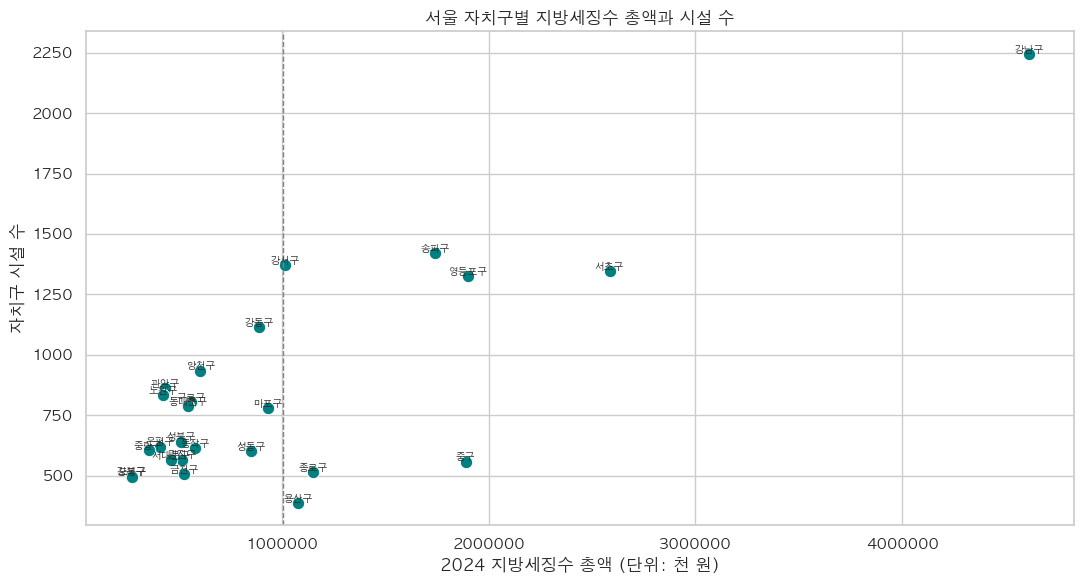

In [41]:
plt.figure(figsize=(11, 6))
sns.scatterplot(
    data=district_insights,
    x='세수총액_2024',
    y='facility_count',
    color='teal',
    s=80
)
for _, row in district_insights.iterrows():
    plt.text(row['세수총액_2024'], row['facility_count'] + 5, row['시군구'], fontsize=7, ha='center')
plt.title('서울 자치구별 지방세징수 총액과 시설 수')
plt.xlabel('2024 지방세징수 총액 (단위: 천 원)')
plt.ylabel('자치구 시설 수')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')
plt.axvline(district_insights['세수총액_2024'].mean(), color='gray', linestyle='--', linewidth=1)
plt.show()

/opt/homebrew/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/sd/84ksnxwj58j1vx31b51v1z6c0000gn/T/ipykernel_53338/2265858126.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_insights['시군구'], rotation=45, ha='right')


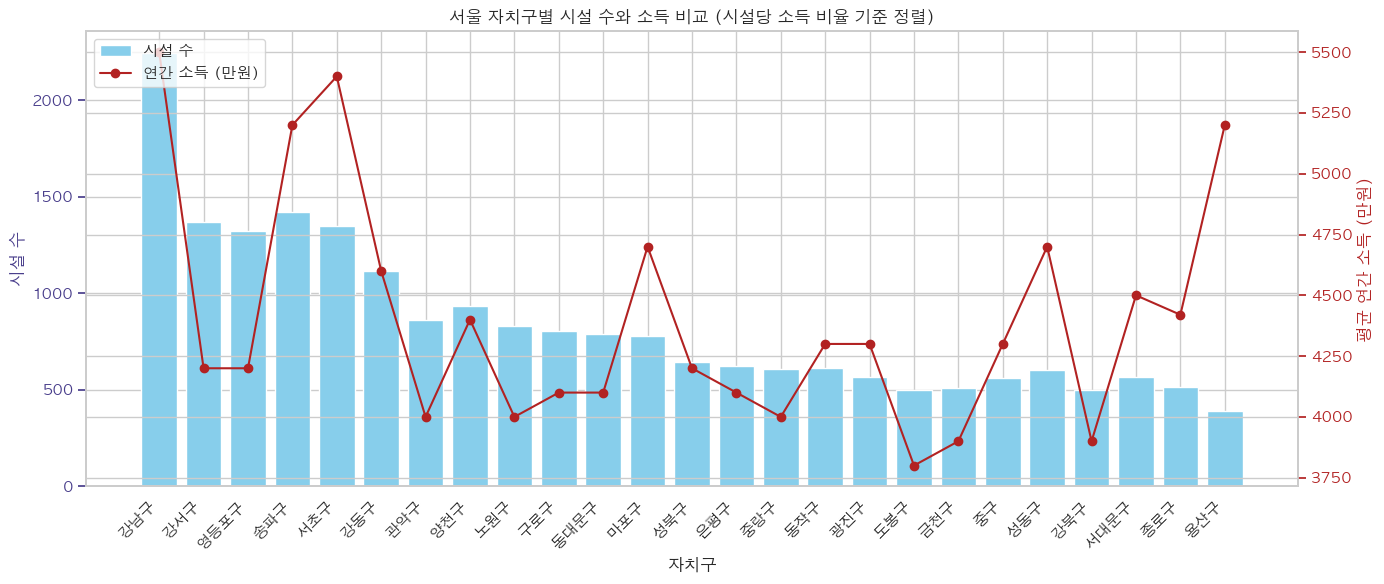

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def load_tax_df():
    tax_path = 'data/지방세징수(구별)_20251202141719.xlsx'
    df = pd.read_excel(tax_path, engine='openpyxl', header=[0, 1, 2])
    flat_columns = [
        '_'.join(str(part).strip() for part in col if str(part).strip())
        for col in df.columns
    ]
    df.columns = flat_columns
    first_col = df.columns[0]
    df = df.rename(columns={first_col: '시군구'})
    df['시군구'] = df['시군구'].astype(str).str.strip()
    df = df[df['시군구'].str.endswith('구')].copy()
    total_candidates = [col for col in df.columns if col.startswith('2024') and '합계' in col]
    total_col = total_candidates[0] if total_candidates else df.columns[1]
    df['세수총액_2024'] = pd.to_numeric(df[total_col], errors='coerce').fillna(0)
    return df[['시군구', '세수총액_2024']]

facility_csv = 'data/전국체육시설 현황(표준데이터).csv'
facility_df = pd.read_csv(facility_csv, encoding='cp949', low_memory=False)
facility_df = facility_df.rename(columns=str.strip)
seoul_df = facility_df[facility_df['시도'] == '서울특별시'].copy()
seoul_df['시군구'] = seoul_df['시군구'].str.strip()
district_type_counts = (
    seoul_df.groupby(['시군구', '시설유형명']).size().reset_index(name='count')
)
district_totals = (
    district_type_counts.groupby('시군구', as_index=False)['count']
    .sum()
    .rename(columns={'count': 'facility_count'})
)
income_values = [
    ('종로구', 4420), ('중구', 4300), ('용산구', 5200), ('성동구', 4700), ('광진구', 4300),
    ('동대문구', 4100), ('중랑구', 4000), ('성북구', 4200), ('강북구', 3900), ('도봉구', 3800),
    ('노원구', 4000), ('은평구', 4100), ('서대문구', 4500), ('마포구', 4700), ('양천구', 4400),
    ('강서구', 4200), ('구로구', 4100), ('금천구', 3900), ('영등포구', 4200), ('동작구', 4300),
    ('관악구', 4000), ('강남구', 5500), ('서초구', 5400), ('송파구', 5200), ('강동구', 4600)
]
income_df = pd.DataFrame(income_values, columns=['시군구', '연간_소득_만원']).sort_values('시군구').reset_index(drop=True)
tax_df = load_tax_df()
district_insights = district_totals.merge(income_df, how='left', on='시군구')
district_insights = district_insights.merge(tax_df, how='left', on='시군구')
district_insights['세수총액_2024'] = district_insights['세수총액_2024'].fillna(0)
district_insights['시설당_소득비율'] = district_insights['facility_count'] / district_insights['연간_소득_만원']
sorted_insights = district_insights.sort_values('시설당_소득비율', ascending=False)
fig, ax1 = plt.subplots(figsize=(14, 6))
bar = ax1.bar(sorted_insights['시군구'], sorted_insights['facility_count'], color='skyblue', label='시설 수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('시설 수', color='darkslateblue')
ax1.tick_params(axis='y', colors='darkslateblue')
ax1.set_xticklabels(sorted_insights['시군구'], rotation=45, ha='right')
ax2 = ax1.twinx()
line = ax2.plot(sorted_insights['시군구'], sorted_insights['연간_소득_만원'], color='firebrick', marker='o', label='연간 소득 (만원)')
ax2.set_ylabel('평균 연간 소득 (만원)', color='firebrick')
ax2.tick_params(axis='y', colors='firebrick')
ax1.set_title('서울 자치구별 시설 수와 소득 비교 (시설당 소득 비율 기준 정렬)')
fig.tight_layout()
plt.legend(handles=[bar, line[0]], loc='upper left')
plt.show()

#### 구별 정책 방향
- **도봉구, 강북구, 중랑구**: 평균 소득과 세수 모두 낮은데 시설 수가 상대적으로 적음. 생활체육센터 1~2개 추가 조성, 주민 셔틀+교통비 보조, 동단위 거점 프로그램 예산 집중. 체육시설 운영은 지역사회 협동조합에 위탁하여 관리를 분산시키고, 매 분기 `시설당_소득비율`과 `세수 대비 시설 수` 지표를 SNS와 보고서에 공개해 시민 피드백을 수렴.
- **노원구, 은평구, 구로구**: 소득은 중간 수준이지만 세수 대비 시설수가 낮아 세수 확보가 중요한 구. 기존 시설 리모델링과 위탁 운영으로 서비스 품질을 유지하고, 기업·대학 협업 공모전을 열어 지역 스타트업과 생활체육 프로그램을 연결.
- **서대문구, 마포구, 용산구**: 비교적 소득과 세수가 높고 시설 수도 많지만 지역 커뮤니티 중심의 공간 부족. 청년+가족 대상 '모두의 체육공간'을 공공 임대 부지에 배치, 스마트 예약·이용 데이터를 공개해 고소득층의 체육 수요를 공공으로 흡수.
- **강남구, 서초구, 송파구, 강동구**: 세수가 가장 높으므로 대규모 공공체육 플랫폼(레거시 경륜, 실내체육관)과 민간 프리미엄 시설의 거점 운영을 통해 세수 퍼포먼스를 상징적으로 보여줄 수 있음. 정기 리포트와 캠페인으로 ‘체육문화 핵심지’라는 메시지를 유지하면서, 확보된 예산으로 도심 내 저소득 구에 재분배하는 `퍼블릭 펀드`를 운영.
- **종로구, 중구, 광진구, 성동구, 성북구, 영등포구, 동작구, 관악구, 양천구, 강서구**: 각 구의 세수·소득·시설 수 지표를 한 페이지 카드로 정리하여 선거 유세 때 강조할 수 있도록 하며, 주변의 재정자립도에 따라 시설 개·보수를 교차지원. 특히 주거밀집도가 높은 양천·강서에는 주민 질의 응답형 팝업체육교실을 상시 운영해 '생활 속 체육' 메시지를 강화.